In [144]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

In [3]:
raw_df = pd.read_excel('C:\\Users\\Merci\\Desktop\\cis520 project\\credit-card-default-prediction\\default_of_credit_card_clients.xls', skiprows=1)
raw_df.drop(['ID'], axis = 1, inplace = True)

In [4]:
raw_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
data_one_hot = pd.get_dummies(raw_df, columns=['EDUCATION', 'MARRIAGE', 'SEX'])
data_one_hot.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'SEX_1', 'SEX_2'],
      dtype='object')

In [68]:
data_one_hot.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_1,SEX_2
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,0,1,0,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,0,0,0,0,0,1,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,0,0,0,0,1,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,0,0,0,1,0,0,0,1
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,0,0,0,0,1,0,0,1,0


In [227]:
'''
X = data_one_hot[['LIMIT_BAL', 'AGE', 'PAY_0','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'SEX_1', 'SEX_2']]

'''
X = data_one_hot.drop(['default payment next month'], axis =1)

y = data_one_hot['default payment next month']

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [229]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
#X_train, y_train = ros.fit_sample(X_train, y_train)

In [230]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [231]:
pd.DataFrame(X_train).to_csv('X_train.csv', index = False)
pd.DataFrame(X_test).to_csv('X_test.csv', index = False)
pd.DataFrame(y_train).to_csv('y_train.csv', index = False)
pd.DataFrame(y_test).to_csv('y_test.csv', index = False)

In [319]:
X_train.shape

(18000, 33)

In [329]:
ratio = 0.225
print('Building Neural Network model...')
#adam = optimizers.Adagrad(lr=0.2, epsilon=None, decay=0.0)
adam = optimizers.Adam(lr=0.2, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
class_weight = {0:ratio, 1:1-ratio}
model = Sequential()

model.add(Dense(32, input_dim=X_train.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(100),
                activation="relu"))

model.add(Dense(32,
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(100),
                activation="relu"))

model.add(Dropout(0.1))

model.add(Dense(32,
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(100),
                activation="relu"))

model.add(Dense(32,
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(100),
                activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam')
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=50)]

history = model.fit(X_train, y_train, validation_split=0.20, epochs=800, batch_size=1024, \
                    class_weight=class_weight, callbacks=callbacks)

Building Neural Network model...
Train on 14400 samples, validate on 3600 samples
Epoch 1/800
14400/14400 [==============================] - 6s 435us/step - loss: 0.2400 - val_loss: 0.2380
Epoch 2/800
14400/14400 [==============================] - 0s 15us/step - loss: 0.2391 - val_loss: 0.2361
Epoch 3/800
14400/14400 [==============================] - 0s 17us/step - loss: 0.2354 - val_loss: 0.2299
Epoch 4/800
14400/14400 [==============================] - 0s 16us/step - loss: 0.2264 - val_loss: 0.2186
Epoch 5/800
14400/14400 [==============================] - 0s 15us/step - loss: 0.2168 - val_loss: 0.2120
Epoch 6/800
14400/14400 [==============================] - 0s 17us/step - loss: 0.2129 - val_loss: 0.2109
Epoch 7/800
14400/14400 [==============================] - 0s 16us/step - loss: 0.2123 - val_loss: 0.2087
Epoch 8/800
14400/14400 [==============================] - 0s 16us/step - loss: 0.2103 - val_loss: 0.2082
Epoch 9/800
14400/14400 [==============================] - 0s 20us/st

Epoch 77/800
14400/14400 [==============================] - 0s 18us/step - loss: 0.1938 - val_loss: 0.1948
Epoch 78/800
14400/14400 [==============================] - 0s 25us/step - loss: 0.1948 - val_loss: 0.1949
Epoch 79/800
14400/14400 [==============================] - 0s 28us/step - loss: 0.1942 - val_loss: 0.1941
Epoch 80/800
14400/14400 [==============================] - 0s 24us/step - loss: 0.1935 - val_loss: 0.1948
Epoch 81/800
14400/14400 [==============================] - 0s 23us/step - loss: 0.1939 - val_loss: 0.1944
Epoch 82/800
14400/14400 [==============================] - 0s 24us/step - loss: 0.1929 - val_loss: 0.1944
Epoch 83/800
14400/14400 [==============================] - 0s 21us/step - loss: 0.1937 - val_loss: 0.1962
Epoch 84/800
14400/14400 [==============================] - 0s 20us/step - loss: 0.1949 - val_loss: 0.1949
Epoch 85/800
14400/14400 [==============================] - 0s 32us/step - loss: 0.1947 - val_loss: 0.1948
Epoch 86/800
14400/14400 [===========

14400/14400 [==============================] - 1s 35us/step - loss: 0.1894 - val_loss: 0.1934
Epoch 153/800
14400/14400 [==============================] - 0s 33us/step - loss: 0.1887 - val_loss: 0.1941
Epoch 154/800
14400/14400 [==============================] - 0s 34us/step - loss: 0.1883 - val_loss: 0.1940
Epoch 155/800
14400/14400 [==============================] - 0s 26us/step - loss: 0.1892 - val_loss: 0.1943
Epoch 156/800
14400/14400 [==============================] - 0s 30us/step - loss: 0.1891 - val_loss: 0.1953
Epoch 157/800
14400/14400 [==============================] - 0s 22us/step - loss: 0.1892 - val_loss: 0.1958
Epoch 158/800
14400/14400 [==============================] - 0s 20us/step - loss: 0.1883 - val_loss: 0.1942
Epoch 159/800
14400/14400 [==============================] - 0s 20us/step - loss: 0.1878 - val_loss: 0.1948
Epoch 160/800
14400/14400 [==============================] - 0s 20us/step - loss: 0.1888 - val_loss: 0.1931
Epoch 161/800
14400/14400 [===============

Epoch 228/800
14400/14400 [==============================] - 0s 19us/step - loss: 0.1854 - val_loss: 0.1946
Epoch 229/800
14400/14400 [==============================] - 0s 20us/step - loss: 0.1843 - val_loss: 0.1937
Epoch 230/800
14400/14400 [==============================] - 0s 17us/step - loss: 0.1856 - val_loss: 0.1938
Epoch 231/800
14400/14400 [==============================] - 0s 18us/step - loss: 0.1846 - val_loss: 0.1941
Epoch 232/800
14400/14400 [==============================] - 0s 17us/step - loss: 0.1846 - val_loss: 0.1945
Epoch 233/800
14400/14400 [==============================] - 0s 31us/step - loss: 0.1863 - val_loss: 0.1950
Epoch 234/800
14400/14400 [==============================] - 0s 35us/step - loss: 0.1858 - val_loss: 0.1952
Epoch 235/800
14400/14400 [==============================] - 0s 28us/step - loss: 0.1855 - val_loss: 0.1957
Epoch 236/800
14400/14400 [==============================] - 1s 40us/step - loss: 0.1852 - val_loss: 0.1941
Epoch 237/800
14400/14400 [=

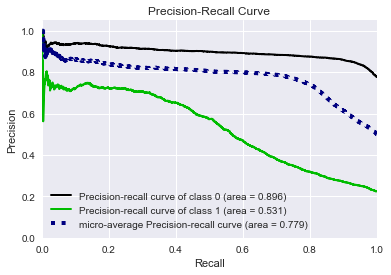

In [315]:
y_hat = model.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, np.concatenate([1-y_hat, y_hat], axis = 1))
plt.show()

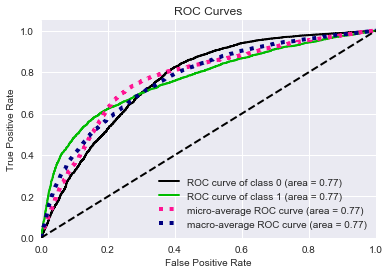

In [330]:
y_hat = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, np.concatenate([1-y_hat, y_hat], axis = 1))
plt.show()

In [296]:
y_hat_01 = model.predict_classes(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat_01)

array([[7608, 1710],
       [1109, 1573]], dtype=int64)

In [248]:
y_hat_train_01 = model.predict_classes(X_train)
confusion_matrix(y_train, y_hat_train_01)

array([[11481,  2565],
       [ 1639,  2315]], dtype=int64)

In [265]:
from sklearn.metrics import recall_score

recall_score(y_test, y_hat_01)

0.48695003728560776

In [266]:
from sklearn.metrics import precision_score

precision_score(y_test, y_hat_01)

0.5683202785030461

In [267]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat_01)

0.5244979919678715

In [268]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_hat_01)

0.8026666666666666

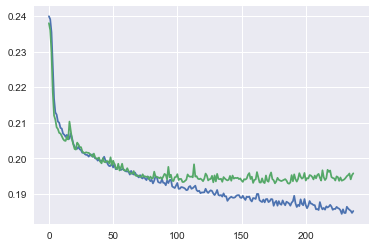

In [331]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

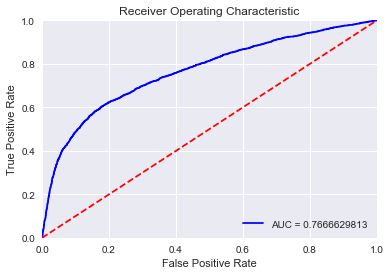

In [332]:
from sklearn import metrics
y_hat = model.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_hat)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.10f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [255]:
y_hat_ada = pd.read_csv('ada.csv')
y_hat_rf = pd.read_csv('rf.csv')

In [256]:
y_hat_ensemble = (y_hat_ada.iloc[:,0] + y_hat_ada.iloc[:,1] + pd.Series(y_hat.ravel()))/3

In [357]:
from sklearn import metrics

for i in range(10000):
    r1 = np.random.random()
    r1 = 0
    r2 = np.random.random()
    r3 = np.random.random()

        
    r1 = r1 / (r1+r2+r3)
    r2 = r2 / (r1+r2+r3)
    r3 = r3 / (r1+r2+r3)
    y_hat_ensemble = (y_hat_ada.iloc[:,1]) * r1 + (y_hat_rf.iloc[:,1]) * r2 + pd.Series(y_hat.ravel()) * r3

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_hat_ensemble)
    roc_auc = metrics.auc(fpr, tpr)
    
    if roc_auc  > 0.766663:
        print(i, r1, r2, r3, roc_auc)

5828 0.0 0.00017943650249036057 0.9996867564104709 0.76666316138738


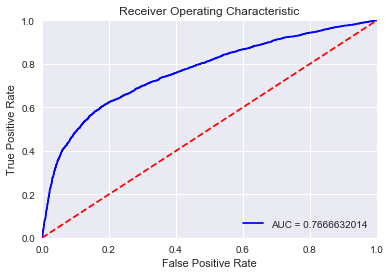

In [358]:
from sklearn import metrics

y_hat_ensemble =   (y_hat_ada.iloc[:,1]) * 0.00017943650249036057 + pd.Series(y_hat.ravel()) * 0.9996867564104709
fpr, tpr, threshold = metrics.roc_curve(y_test, y_hat_ensemble)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.10f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [359]:
pd.DataFrame(y_hat).to_csv('nn.csv', index = False)

In [360]:
pd.DataFrame(y_hat_ensemble).to_csv('ensemble.csv', index = False)

In [369]:
pd.DataFrame(X_train).sample(n=200).to_csv('down.csv', index = False)

In [373]:
raw_df.sample(n=200).to_csv('down.csv', index = False)